In [60]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from tensorflow.keras.utils import to_categorical

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = '/content/sample_data'

In [8]:
os.chdir(path)

In [9]:
os.listdir()

['anscombe.json',
 'README.md',
 'Corona_NLP_train.csv',
 'mnist_test.csv',
 'mnist_train_small.csv',
 'california_housing_train.csv',
 'california_housing_test.csv']

In [11]:
df = pd.read_csv('Corona_NLP_train.csv',encoding='latin-1')

In [12]:
df.shape


(41157, 6)

In [13]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [15]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [16]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [17]:
df.groupby('Sentiment').count()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
Sentiment,,,,,
Extremely Negative,5481,5481,4249,5481,5481
Extremely Positive,6624,6624,5273,6624,6624
Negative,9917,9917,7763,9917,9917
Neutral,7713,7713,6172,7713,7713
Positive,11422,11422,9110,11422,11422


In [18]:
heat=df.groupby('Sentiment').count()

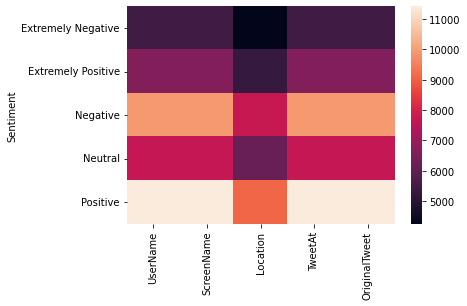

In [20]:
sns.heatmap(heat,cbar=True)

In [21]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [22]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [24]:
df['Sentiment']=df['Sentiment'].replace('Extremely Positive','Positive')
df['Sentiment']=df['Sentiment'].replace('Extremely Negative','Negative')

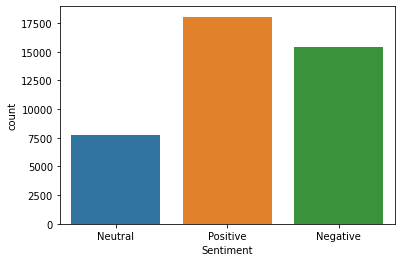

In [26]:
sns.countplot(x=df['Sentiment'])

In [30]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
# converting string based sentiments into numeric valuye which can be further used for training ML algorithm
df['Sentiment']=lb.fit_transform(df['Sentiment'])
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [32]:
import re

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

#stop_words.extend(['crypto','even','early'])

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [33]:
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2
3,3802,48754,London,16-03-2020,My food stock is not the only one which is emp...,2
4,3803,48755,London,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,1
41153,44952,89904,London,14-04-2020,Response to complaint not provided citing COVI...,0
41154,44953,89905,London,14-04-2020,You know itÂs getting tough when @KameronWild...,2
41155,44954,89906,London,14-04-2020,Is it wrong that the smell of hand sanitizer i...,1


In [35]:
df_clean=df_clean.drop(columns=['ScreenName','Location','TweetAt','UserName'])

In [36]:
df_clean.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,advice Talk to your neighbours family to excha...,2
2,Coronavirus Australia: Woolworths to give elde...,2
3,My food stock is not the only one which is emp...,2
4,"Me, ready to go at supermarket during the #COV...",0


In [37]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.2 MB/s 


In [38]:
import demoji
def handle_emoji(string):
    #x = string.to_string(header=False, index=False)
    emojis = demoji.findall(string)
    #print(emojis)
    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [ ]:
def text_cleaner(review):
  # removing the not required texts
  cleaned_review = re.sub(re.compile('<.*?>'), '', review) #removing HTML tags
  cleaned_review = re.sub('[^A-Za-z]+', ' ', cleaned_review) #taking only words
  cleaned_review = handle_emoji(cleaned_review)
  cleaned_review = re.sub(r"http\S+", "", cleaned_review) 
  cleaned_review = cleaned_review.lower()

  tokens = nltk.word_tokenize(cleaned_review)

  filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

  lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]
  review = " ".join(lemm_review)
  return(review)

In [39]:
def text_cleaner(review):
  # removing the not required texts
  cleaned_review = re.sub(re.compile('<.*?>'), '', review) #removing HTML tags
  cleaned_review = re.sub('[^A-Za-z]+', ' ', cleaned_review) #taking only words
  cleaned_review = handle_emoji(cleaned_review)
  cleaned_review = re.sub(r"http\S+", "", cleaned_review) 
  cleaned_review = cleaned_review.lower()

  tokens = nltk.word_tokenize(cleaned_review)

  filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

  lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]
  review = " ".join(lemm_review)
  return(review)

In [42]:
cleanText=[]

for t in df_clean['OriginalTweet']:
 cleanText.append(text_cleaner(t))

df_clean['OriginalTweet'] = cleanText
df_clean.head()

,OriginalTweet,Sentiment,cleanText
0,menyrbie phil gahan chrisitv co ifz fan pa co ...,1,menyrbie phil gahan chrisitv co ifz fan pa co ...
1,advice talk neighbour family exchange phone nu...,2,advice talk neighbour family exchange phone nu...
2,coronavirus australia woolworth give elderly d...,2,coronavirus australia woolworth give elderly d...
3,food stock one empty please panic enough food ...,2,food stock one empty please panic enough food ...
4,ready go supermarket covid outbreak paranoid f...,0,ready go supermarket covid outbreak paranoid f...


In [43]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

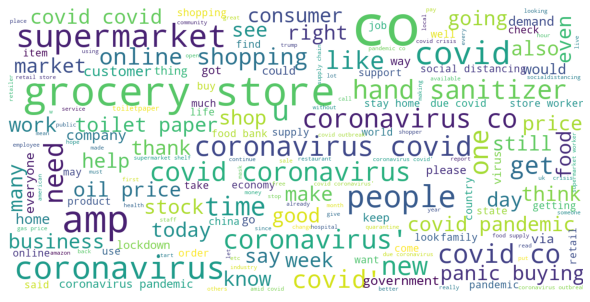

In [44]:
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42,
        stopwords= stop_words
    ).generate(str(cleanText))                
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [46]:
new_stopwords = ['many','know','new','price','see',
                 'use','go','much','due']

In [47]:
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

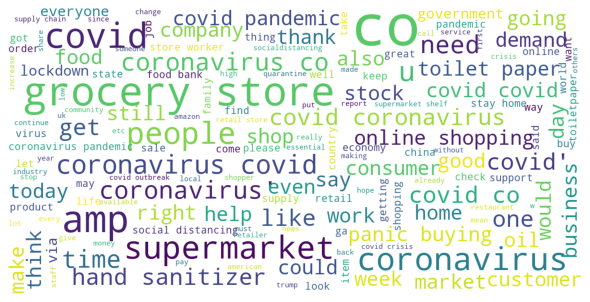

In [48]:
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42,
        stopwords= stpwrd
    ).generate(str(cleanText))                
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [49]:
df_clean.drop(columns=['OriginalTweet'])

,Sentiment,cleanText
0,1,menyrbie phil gahan chrisitv co ifz fan pa co ...
1,2,advice talk neighbour family exchange phone nu...
2,2,coronavirus australia woolworth give elderly d...
3,2,food stock one empty please panic enough food ...
4,0,ready go supermarket covid outbreak paranoid f...
...,...,...
41152,1,airline pilot offering stock supermarket shelf...
41153,0,response complaint provided citing covid relat...
41154,2,know getting tough kameronwilds rationing toil...
41155,1,wrong smell hand sanitizer starting turn coron...


In [50]:
X=df_clean.cleanText
Y=df_clean.Sentiment

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [53]:
#Tokenization
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
word_index = tok.word_index
sequences_matrix

array([[   0,    0,    0, ...,  684,    1,    1],
       [   0,    0,    0, ...,   31,  947,   99],
       [   0,    0,    0, ...,   68,    1,  184],
       ...,
       [   0,    0,    0, ..., 1219,   28,   12],
       [   0,    0,    0, ...,    3,    2,    3],
       [   0,    0,    0, ...,  521,  661,    2]], dtype=int32)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, Y, test_size=0.3, random_state=2)

In [55]:
#feature modelling
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     200,
                     input_length=max_len))
model.add(SimpleRNN(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss =SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          15231800  
                                                                 
 simple_rnn (SimpleRNN)      (None, 200)               80200     
                                                                 
 dense (Dense)               (None, 3)                 603       
                                                                 
Total params: 15,312,603
Trainable params: 15,312,603
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(X_train, Y_train, epochs=5) 

Epoch 1/5
901/901 [==============================] - 442s 490ms/step - loss: 0.5344 - accuracy: 0.8075
Epoch 2/5
901/901 [==============================] - 444s 493ms/step - loss: 0.5396 - accuracy: 0.8025
Epoch 3/5
901/901 [==============================] - 444s 493ms/step - loss: 0.5038 - accuracy: 0.8184
Epoch 4/5
901/901 [==============================] - 449s 498ms/step - loss: 0.4991 - accuracy: 0.8219
Epoch 5/5
901/901 [==============================] - 453s 503ms/step - loss: 0.5258 - accuracy: 0.8017


In [63]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.9 MB/s 
     |████████████████████████████████| 182 kB 68.2 MB/s 
     |████████████████████████████████| 7.6 MB 70.8 MB/s 


In [64]:
from transformers import pipeline

In [67]:
pip install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 4.8 MB/s 
     |████████████████████████████████| 132 kB 49.5 MB/s 
     |████████████████████████████████| 212 kB 50.6 MB/s 
     |████████████████████████████████| 127 kB 62.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [68]:
from datasets import load_dataset
from datasets import Dataset

In [69]:
classifier1 = pipeline("sentiment-analysis"
                        )


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [71]:
dataset = Dataset.from_pandas(df_clean)

In [72]:
dataset

Dataset({
    features: ['OriginalTweet', 'Sentiment', 'cleanText', '__index_level_0__'],
    num_rows: 41157
})

In [73]:
dataset["cleanText"]

['menyrbie phil gahan chrisitv co ifz fan pa co xx ghgfzcc co nlzdxno',
 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order',
 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid outbreak co binca vp p',
 'food stock one empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral co zrlg z j',
 'ready go supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement co usmualq n',
 'news region first confirmed covid case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report co cfxch lu',
 'cashier grocery store sharing insight covid

In [74]:
classifier1(dataset["cleanText"][:5])

[{'label': 'NEGATIVE', 'score': 0.9692298769950867},
 {'label': 'NEGATIVE', 'score': 0.9938563704490662},
 {'label': 'NEGATIVE', 'score': 0.9835482239723206},
 {'label': 'NEGATIVE', 'score': 0.9972192049026489},
 {'label': 'NEGATIVE', 'score': 0.9989985823631287}]

In [75]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [79]:
summarizer(dataset["cleanText"][:5],max_length=80)

Your max_length is set to 80, but you input_length is only 30. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 80, but you input_length is only 29. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 80, but you input_length is only 27. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 80, but you input_length is only 39. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 80, but you input_length is only 43. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[{'summary_text': ' Menyrbie phil gahan gahan chrisitv co ifz fan pa co xx ghgfzcc co nlzdxno. menyrbie Phil Phil is a fan of the show . Phil is also a fan . Phil has been a fan for more than a decade .'},
 {'summary_text': " Talk neighbour family exchange phone number create contact list phone number . Set online shopping account account po adequate supply of regular med order . Contact list phone numbers for school employers, family, school, GP, pharmacist, GP and pharmacist . Go to the chemist's website to find out how to buy medication ."},
 {'summary_text': ' coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid outbreak . woolworth gives elderly disabled a dedicated shopping time amid the outbreak of coronaavirus . corona virus is a suspected form of human infection that has been linked to an outbreak of the virus in Australia and Australia .'},
 {'summary_text': ' food stock one empty please panic enough food everyone take need stay calm stay s